<a href="https://colab.research.google.com/github/Zyzzas1/zyzz/blob/main/proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense


In [2]:
import requests

# URL of the raw file on GitHub
url = "https://github.com/trokas/ai_primer/raw/master/flatland_train.npz"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open("flatland_train.npz", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully.


In [4]:
data = np.load('flatland_train.npz')
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255.


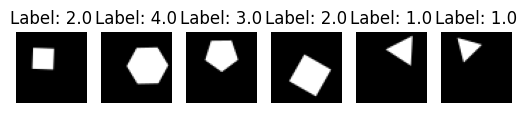

In [5]:
import matplotlib.pyplot as plt
import numpy as np


for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.show()


In [6]:
unique_labels, label_counts = np.unique(y, return_counts=True)

# Print the results
for label, count in zip(unique_labels, label_counts):
    print(f'Label {label}: {count} ')

Label 0.0: 1381 
Label 1.0: 2853 
Label 2.0: 1868 
Label 3.0: 2137 
Label 4.0: 1761 


In [7]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("X Test shape:", X_test.shape)
print("Y Train shape:", y_train.shape)
print("Y Test shape:", y_test.shape)

X Train shape: (8000, 50, 50)
X Test shape: (2000, 50, 50)
Y Train shape: (8000,)
Y Test shape: (2000,)


In [51]:
from google.colab import files

files.download('zyz1.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import os


Current Working Directory: /content


In [8]:

from keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1)
X_val = X_test.reshape(X_test.shape[0], 50, 50, 1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,

    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)  # Fit the data generator on the training data

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with data augmentation
model.summary()
# Save the model to a file
model.save('model.h5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: >

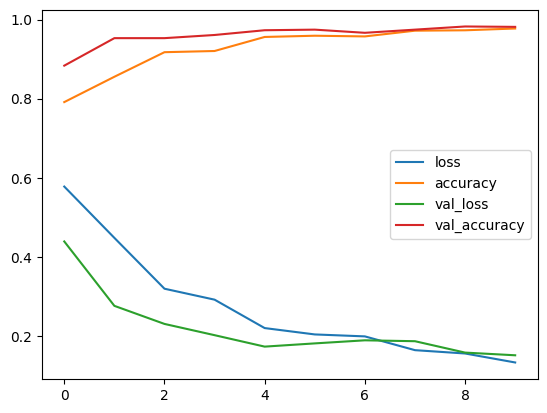

In [52]:
pd.DataFrame(loss.history).plot()

In [ ]:
from itertools import product
from tqdm import tqdm
# Define the hyperparameter ranges to search
rotation_ranges = [10, 20, 30]
width_shift_ranges = [0.1, 0.2, 0.3]
height_shift_ranges = [0.1, 0.2, 0.3]

# Initialize a dictionary to store the results
results = {}

# Perform grid search
for rotation_range, width_shift_range, height_shift_range in tqdm(product(rotation_ranges, width_shift_ranges, height_shift_ranges)):
    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    # Model architecture (use your model definition here)

    # Compile the model (use your compile configuration here)

    # Training with data augmentation
    history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=8, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Store the results
    results[(rotation_range, width_shift_range, height_shift_range)] = accuracy

# Print the results
for params, accuracy in results.items():
    print(f"Parameters: {params}, Accuracy: {accuracy}")

12it [08:15, 42.99s/it]